Code for running in-situ gas cell TEM simulations based on [abTEM](https://abtem.readthedocs.io/en/latest/) EM simulation package.

Notebook written by Stephanie Ribet, Kunmo Koo, Xiaobing Hu and Vinayak P. Dravid at the [VPD Group](https://vpd.ms.northwestern.edu/) and [NUANCE Center](http://www.nuance.northwestern.edu/) at Northwestern University. 

In [ ]:
from abtem import __version__
print('current version:', __version__)

from ase.io import read
from ase.cluster import wulff_construction
from ase import Atoms
import matplotlib.pyplot as plt
import numpy as np
from abtem import *

In [8]:
from ase.io import read
atoms = read('stack.xyz')

In [9]:
#469-178 #difference in cell dimensions for derocus

291

In [10]:
atoms.cell=[74.45509527731882,74.5842405642861,177.92456092101355] #normal
#atoms.cell=[74.45509527731882,74.5842405642861,469.0580227180494] #ETEM

In [11]:
# potential = Potential(atoms, 
#                       gpts=1024, 
#                       slice_thickness=1, 
#                       parametrization='kirkland', 
#                       projection='infinite')

In [12]:
sigmas = {'S': 10, 'Ar': 10, 'He':10, 'Si':0.05, 'N':0.05, 'Au':0.05} # standard deviations of thermal vibrations 
num_configs = 16 # number of frozen phonon configurations
#was 16
frozen_phonons = FrozenPhonons(atoms, num_configs=num_configs, sigmas=sigmas)
potential = Potential(frozen_phonons, gpts=512, slice_thickness=0.5, parametrization='kirkland', projection='infinite')

In [13]:
wave = PlaneWave(
    energy=200e3 # acceleration voltage in eV
)

exit_wave = wave.multislice(potential)

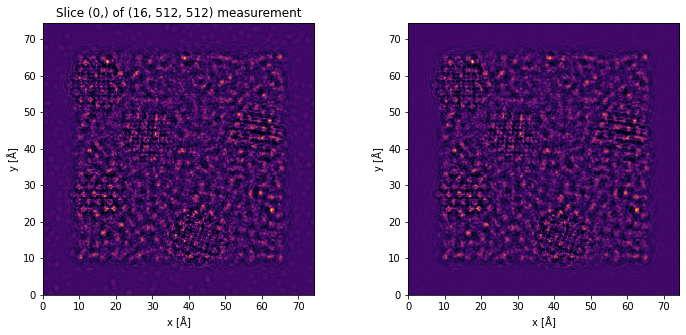

In [14]:
fig,(ax1,ax2)=plt.subplots(1,2,figsize=(12,5))
exit_wave.intensity().show(figsize=(6,6), ax=ax1, cmap='inferno');
exit_wave.intensity().mean(0).show(figsize=(6,6), ax=ax2, cmap='inferno');

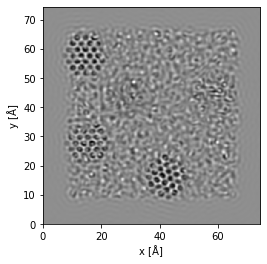

In [15]:
ctf = CTF(
    energy = wave.energy,
    semiangle_cutoff = 15, # mrad
    focal_spread = 0, # Å
    defocus = 85,#291+85,
    #+291, # Å #85
    Cs = 0e7, # Å
)


image_wave = exit_wave.apply_ctf(ctf)

image_wave.intensity().mean(0).show();

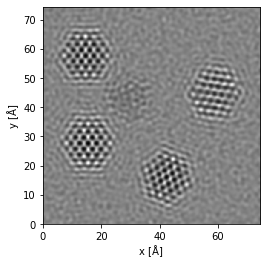

In [75]:
ctf = CTF(
    energy = wave.energy,
    semiangle_cutoff = 15, # mrad
    focal_spread = 1e7*0.3/200000, # Å
    defocus = 85+291,
    #+291, # Å 
    Cs = 0.3e7, # Å
)


image_wave = exit_wave.apply_ctf(ctf)

image_wave.intensity().mean(0).show();

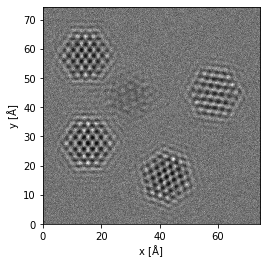

In [30]:
from abtem.noise import poisson_noise

measurement = image_wave.intensity().mean(0)
noisy_measurement = poisson_noise(measurement, 5000)

noisy_measurement.show();

In [31]:
# noisy_measurement.save_as_image('NB.tif')

In [16]:
image_wave.intensity().mean(0).save_as_image('stack_1.tif')